---
title: 21天学通C++ Chapter11 多态
tags: 小书匠,21天学通C++,C++,多态
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# 21天学通C++ Chapter11 多态

## 多态基础

### 为什么需要多态

In [10]:
#include <iostream>

class Fish
{
    public: 
        void Swim() { std::cout << "Fish swims!\n"; }
};

In [11]:
class Tuna: public Fish
{
    public:
        void Swim() { std::cout << "Tuna swims!\n";}
}

In [12]:
void MakeFishSwim(Fish& fish) 
{
    fish.Swim();
}

Tuna tuna;
tuna.Swim();
MakeFishSwim(tuna); // 调用的是 Fish::Swim 而不是 Tuna::Swim

Tuna swims!
Fish swims!


上面说明了一个问题，如果使用基类的指针来调用子类实例的方法时，调用的是基类的方法而不是子类的方法。

### 使用虚函数实现多态行为

什么是多态：将派生类对象视为基类对象，并执行派生类的方法。

In [13]:
#include <iostream>

class Fish
{
    public: 
        virtual void Swim() { std::cout << "Fish swims!\n"; }
};

In [14]:
class Tuna: public Fish
{
    public:
        void Swim() { std::cout << "Tuna swims!\n";}
}

In [9]:
void MakeFishSwim(Fish& fish) 
{
    fish.Swim();
}

Tuna tuna;
tuna.Swim();
MakeFishSwim(tuna); // invoke Tuna::Swim!

Tuna swims!
Tuna swims!


### 虚构析函数

我们希望，通过对基类的指针使用 delete 关键字，可以删除子类的对象。这就要求将基类的析构函数也声明为虚函数。

In [32]:
#include <iostream>
class Fish
{
    public:
        Fish() { std::cout << "Fish: constructor\n"; }
        ~Fish() { std::cout << "Fish: destructor\n"; }
};

In [33]:
class Tuna: public Fish
{
    public:
        Tuna() { std::cout << "Tuna: constructor\n"; }
        ~Tuna() { std::cout << "Tuna: destructor\n"; }
};

In [34]:
int main()
{
    std::cout << "Allocating a Tuna on the free store: \n";
    Fish* ptuna = new Tuna;
    delete ptuna;
    
    std::cout << "\n";
    std::cout << "Allocating a Tuna on the stack: \n";
    Tuna tuna;
    return 0;
}

main();

Allocating a Tuna on the free store: 
Fish: constructor
Tuna: constructor
Fish: destructor

Allocating a Tuna on the stack: 
Fish: constructor
Tuna: constructor
Tuna: destructor
Fish: destructor


从上面的示例中可以看到，如果是在栈上销毁 Tuna 对象，那么会依次调用子类和基类的析构函数。

但是，如果是在堆上产生了一个对象子类对象，并且将其当作基类指针去 delete，那么就会导致只调用基类的析构函数，而不调用子类的析构函数，因此会造成内存泄漏。

如果我们将上面的代码中基类的析构函数修改为虚函数，那么结果会正确调用子类的析构函数和基类的析构函数。

In [25]:
#include <iostream>
class Fish
{
    public:
        Fish() { std::cout << "Fish: constructor\n"; }
        virtual ~Fish() { std::cout << "Fish: destructor\n"; }
};

In [26]:
class Tuna: public Fish
{
    public:
        Tuna() { std::cout << "Tuna: constructor\n"; }
        ~Tuna() { std::cout << "Tuna: destructor\n"; }
};

In [27]:
void DeleteFish(Fish* pfish) {
    delete pfish;
}

In [28]:
int main()
{
    std::cout << "Allocating a Tuna on the free store: \n";
    Tuna* ptuna = new Tuna;
    DeleteFish(ptuna);
    
    std::cout << "\n";
    std::cout << "Allocating a Tuna on the stack: \n";
    Tuna tuna;
    return 0;
}

main();

Allocating a Tuna on the free store: 
Fish: constructor
Tuna: constructor
Tuna: destructor
Fish: destructor

Allocating a Tuna on the stack: 
Fish: constructor
Tuna: constructor
Tuna: destructor
Fish: destructor


### 虚函数的工作原理——理解虚函数表

假设有两个类：Base 和 Derived，其中 Base 类中有 N 个虚函数 Func1(), Func2(), ..., FuncN()，而在 Derived 类中将除了 Func2() 之外的虚函数都实现了。

编译器在看到 Base 和 Derived 中有虚函数后，会建立一个虚函数表，用来保存每个虚函数。这个虚函数表可以看做是一个包含函数指针的数组。Base 中会添加一个指向虚函数表的指针。

当 Derived 覆盖 Base 中的函数时，Derived 的虚函数表中的指针会指针覆盖后的实现。而 Derived 中没有重写的虚函数，会指向 Base 的虚函数表中对应的虚函数。

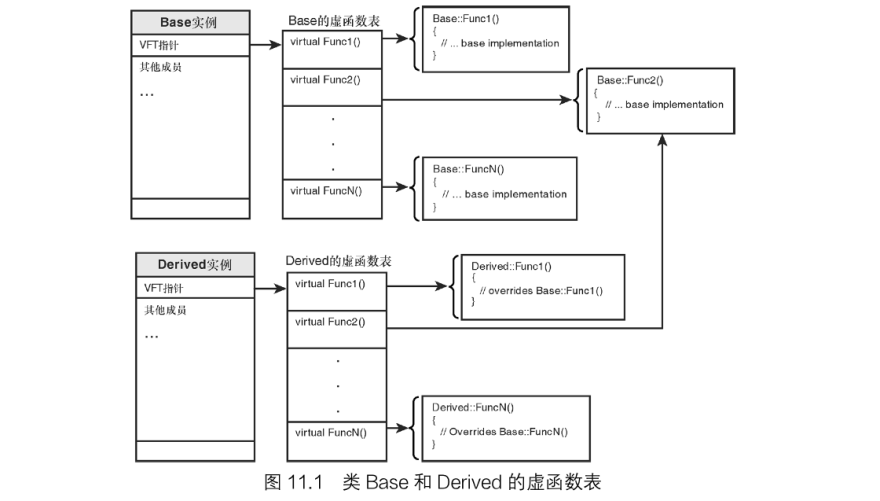

In [36]:
#include <iostream>

class Base1 {
    int a, b;
    public:
        void EmptyFunc() {}
};

class Base2 {
    int a, b;
    public:
        virtual void EmptyFunc() {}
};

In [38]:
std::cout << "sizeof(Base1) = " << sizeof(Base1) << "\n";
std::cout << "sizeof(Base2) = " << sizeof(Base2) << "\n" ;

sizeof(Base1) = 8
sizeof(Base2) = 16


可以看到，Base2 比 Base1 多出了 8 个字节的空间，这个空间实际上就是指向虚函数表的指针占用的。

### 抽象基类和纯虚函数

抽象基类（Abstract Base Class）不能被实例化，只能用来被继承。

包含一个纯虚函数的类就是抽象类，纯虚函数不需要提供实现。

## 表明覆盖意图的限定符 override

## 使用 final 来禁止重写函数

被声明为 final 的虚函数不能在派生类中进行重写。

# References